<a href="https://colab.research.google.com/github/PedroArroyoCruz/PedroArroyoCruz/blob/main/Copy_of_PLANO_DE_SA%C3%9ADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO BIBLIOTECAS

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statistics as stat
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
!pip install pyod
from  pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DATAFRAME

In [65]:
df_modelagem = pd.read_excel('/content/Seguro Saúde - Modelagem.xlsx', sheet_name='MODELAGEM')
df_teste_final = pd.read_excel('/content/Seguro Saúde - Modelagem.xlsx', sheet_name=' TESTE FINAL')

In [66]:
df_modelagem

,MATRICULA,IDADE,NASCIMENTO,SEXO,IMC,FILHOS,FUMANTE,SIGNO,REGIÃO,FACEBOOK,CLASSE,VALOR
0,207,56.0,1963-12-31,M,39.600,0.0,0.0,Capricórnio,3.0,0.0,7.0,3242.022018
1,852,32.0,1987-10-16,F,37.145,3.0,0.0,Libra,2.0,1.0,2.0,1937.108119
2,463,47.0,1973-01-23,F,24.100,1.0,0.0,Aquário,3.0,1.0,7.0,8023.418951
3,628,41.0,1979-01-08,M,30.780,3.0,1.0,Capricórnio,2.0,1.0,6.0,12109.298838
4,1100,23.0,1996-10-07,M,37.100,3.0,0.0,Libra,3.0,1.0,4.0,1100.182263
...,...,...,...,...,...,...,...,...,...,...,...,...
1206,71,61.0,1958-05-26,F,36.385,1.0,1.0,Gêmeos,2.0,0.0,10.0,14837.175275
1207,1198,20.0,2000-02-11,F,31.920,0.0,0.0,Aquário,4.0,1.0,5.0,691.611254
1208,983,27.0,1992-06-04,F,36.080,0.0,1.0,Gêmeos,1.0,1.0,10.0,11355.932171
1209,299,52.0,1967-05-15,M,32.775,3.0,0.0,Touro,4.0,0.0,1.0,3452.326988


VISUALIZAÇÃO DADOS NULOS

In [67]:
df_modelagem.isnull().sum()

MATRICULA     0
IDADE         5
NASCIMENTO    8
SEXO          7
IMC           5
FILHOS        8
FUMANTE       8
SIGNO         6
REGIÃO        6
FACEBOOK      3
CLASSE        5
VALOR         0
dtype: int64

EXCLUINDO TODOS DADOS NULOS PARA VIZUALIÇÃO PRÉVIA DA MATRIZ DE CORRELAÇÃO

In [68]:
df_modelagem_drop = df_modelagem.dropna()

In [69]:
df_modelagem_drop.isnull().sum()

MATRICULA     0
IDADE         0
NASCIMENTO    0
SEXO          0
IMC           0
FILHOS        0
FUMANTE       0
SIGNO         0
REGIÃO        0
FACEBOOK      0
CLASSE        0
VALOR         0
dtype: int64

TRANSFORMANDO VARIÁVEIS 'STRING' EM NUMÉRICAS

In [70]:
obj_LabelEnconder = LabelEncoder()
df_modelagem_drop.loc[:, 'SEXO'] = obj_LabelEnconder.fit_transform(df_modelagem_drop.loc[:, 'SEXO'] )
df_modelagem_drop.loc[:, 'SIGNO'] = obj_LabelEnconder.fit_transform(df_modelagem_drop.loc[:, 'SIGNO'] )


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
df_modelagem_drop.head()

,MATRICULA,IDADE,NASCIMENTO,SEXO,IMC,FILHOS,FUMANTE,SIGNO,REGIÃO,FACEBOOK,CLASSE,VALOR
0,207,56.0,1963-12-31,1,39.600,0.0,0.0,1,3.0,0.0,7.0,3242.022018
1,852,32.0,1987-10-16,0,37.145,3.0,0.0,6,2.0,1.0,2.0,1937.108119
2,463,47.0,1973-01-23,0,24.100,1.0,0.0,0,3.0,1.0,7.0,8023.418951
3,628,41.0,1979-01-08,1,30.780,3.0,1.0,1,2.0,1.0,6.0,12109.298838
4,1100,23.0,1996-10-07,1,37.100,3.0,0.0,6,3.0,1.0,4.0,1100.182263


MATRIZ DE CORRELAÇÃO

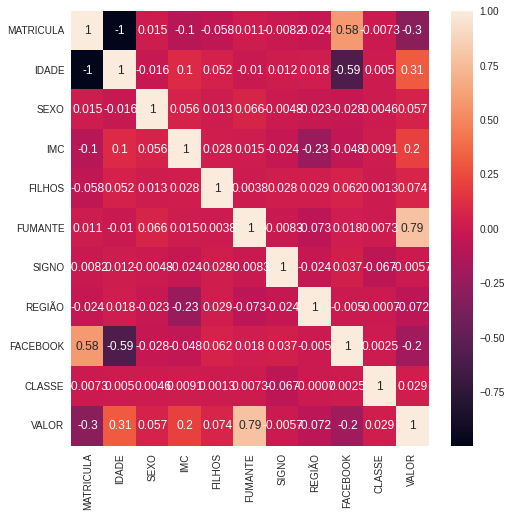

In [72]:
plt.figure(figsize = (8,8))
sns.heatmap(df_modelagem_drop.corr( ), annot = True); 

GRÁFICO DE DISPERSÃO Y = VALOR/X = IDADE

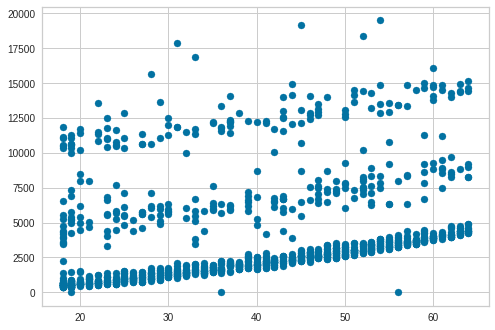

In [73]:
plt.scatter(df_modelagem_drop['IDADE'], df_modelagem_drop['VALOR'])

In [74]:
px.scatter_matrix(df_modelagem_drop, dimensions = ['IDADE','VALOR','SEXO', 'IMC', 'FILHOS', 'REGIÃO', 'FACEBOOK', 'CLASSE'], color='FUMANTE') 

TRATANDO VALORES NULOS IDADE

In [75]:
index_idade = df_modelagem.loc[df_modelagem['IDADE'].isnull(), ['IDADE'] ].index
index_idade

Int64Index([503, 557, 709, 784, 1202], dtype='int64')

In [76]:
index_nascimento = df_modelagem.loc[df_modelagem['NASCIMENTO'].isnull(), ['NASCIMENTO'] ].index
index_nascimento 

Int64Index([108, 232, 419, 483, 557, 784, 793, 974], dtype='int64')

In [77]:
ano = df_modelagem_drop.loc[0,'IDADE'] + df_modelagem_drop.loc[0,'NASCIMENTO'].year
ano

2019.0

In [78]:
obj_LinearRegression = LinearRegression()
obj_LinearRegression.fit(df_modelagem_drop['MATRICULA'].values.reshape(-1,1),df_modelagem_drop['IDADE'].values.reshape(-1,1))
obj_LinearRegression.score(df_modelagem_drop['MATRICULA'].values.reshape(-1,1),df_modelagem_drop['IDADE'].values.reshape(-1,1)) 

0.997803356246363

In [79]:
for i in index_idade:
  if i not in index_nascimento:
    print(i ,'-',ano-df_modelagem.loc[i,'NASCIMENTO'].year)
    df_modelagem.loc[i,'IDADE'] = ano-df_modelagem.loc[i,'NASCIMENTO'].year
  else:
    print(i,'-',obj_LinearRegression.predict(df_modelagem.loc[i,'MATRICULA'].reshape(-1,1))[0][0])
    df_modelagem.loc[i,'IDADE'] = obj_LinearRegression.predict(df_modelagem.loc[i,'MATRICULA'].reshape(-1,1))[0][0]

503 - 31.0
557 - 27.29240012295125
709 - 63.0
784 - 17.420290082297456
1202 - 41.0


In [80]:
df_modelagem.isnull().sum()


MATRICULA     0
IDADE         0
NASCIMENTO    8
SEXO          7
IMC           5
FILHOS        8
FUMANTE       8
SIGNO         6
REGIÃO        6
FACEBOOK      3
CLASSE        5
VALOR         0
dtype: int64

TRATANDO VALORES NULOS FUMANTE

In [81]:
index_fumante = df_modelagem.loc[df_modelagem['FUMANTE'].isnull(), ['FUMANTE'] ].index
index_fumante

Int64Index([31, 657, 658, 708, 709, 791, 909, 1210], dtype='int64')

In [82]:
# 5000 CORTE VISTO NO GRÁFICO DE DISPERSÃO, CORRELACIONANDO VALOR VS FUMANTE
for i in index_fumante:
  if df_modelagem.loc[i,'VALOR'] > 5000:
    df_modelagem.loc[i,'FUMANTE'] = 1
  else:
    df_modelagem.loc[i,'FUMANTE'] = 0

TRATANDO VALORES NULOS SEXO E FILHOS

In [83]:
index_filhos = df_modelagem.loc[df_modelagem['FILHOS'].isnull(), ['FILHOS'] ].index
index_filhos

Int64Index([741, 838, 868, 872, 1057, 1137, 1139, 1204], dtype='int64')

In [84]:
index_sexo = df_modelagem.loc[df_modelagem['SEXO'].isnull(), ['SEXO'] ].index
index_sexo

Int64Index([89, 108, 363, 551, 838, 868, 927], dtype='int64')

In [85]:
# SE A PESSOA FUMA E TEM MENOS DE 1 FILHO, PROBABILIDADE MAIOR DE SER MULHER, SEGUNDO CORTE NO GRÁFICO DE DISPERSÃO
# SE A PESSOA FUMA E REGIÃO <=2, PROBABILIDADE MAIOR DE SER MULHER, SEGUNDO CORTE NO GRÁFICO DE DISPERSÃO
# SE NÃO ATENDER AS CONDIÇÕES ACIMA, SUBSTITUIR PELA MODA DA COLUNA SEXO
for i in index_sexo:
  if  df_modelagem.loc[i,'FUMANTE'] ==1 and  df_modelagem.loc[i,'FILHOS'] <=1:
    df_modelagem.loc[i,'SEXO'] = 'F'
  elif df_modelagem.loc[i,'FUMANTE'] ==1 and  df_modelagem.loc[i,'REGIÃO'] <=2:
    df_modelagem.loc[i,'SEXO'] = 'F'
  else:
    if stat.mode(df_modelagem_drop['SEXO']) == 1:
      df_modelagem.loc[i,'SEXO'] = 'M' 
    else:
      df_modelagem.loc[i,'SEXO'] = 'F' 

In [86]:
#SUBSTITUIR OS FILHOS PELA MÉDIA
for i in index_filhos:
  df_modelagem.loc[i,'FILHOS'] = np.mean(df_modelagem_drop['FILHOS'])

TRATANDO DADOS NULOS REGIÃO,FACEBOOK E CLASSE

In [87]:
df_modelagem.fillna(df_modelagem_drop['REGIÃO'].mean(), inplace= True)
df_modelagem.fillna(df_modelagem_drop['CLASSE'].mean(), inplace= True)
df_modelagem.fillna(df_modelagem_drop['FACEBOOK'].mean(), inplace= True)  

EXCLUINDO COLUNAS SIGNO E NASCIMENTO

In [88]:
del df_modelagem['SIGNO']
del df_modelagem['NASCIMENTO']

In [89]:
df_modelagem.isnull().sum()

MATRICULA    0
IDADE        0
SEXO         0
IMC          0
FILHOS       0
FUMANTE      0
REGIÃO       0
FACEBOOK     0
CLASSE       0
VALOR        0
dtype: int64

In [90]:
df_modelagem.loc[:, 'SEXO'] = obj_LabelEnconder.fit_transform(df_modelagem.loc[:, 'SEXO'] )

BASE DE DADOS TRATADA

In [91]:
df_modelagem.head()

,MATRICULA,IDADE,SEXO,IMC,FILHOS,FUMANTE,REGIÃO,FACEBOOK,CLASSE,VALOR
0,207,56.0,1,39.600,0.0,0.0,3.0,0.0,7.0,3242.022018
1,852,32.0,0,37.145,3.0,0.0,2.0,1.0,2.0,1937.108119
2,463,47.0,0,24.100,1.0,0.0,3.0,1.0,7.0,8023.418951
3,628,41.0,1,30.780,3.0,1.0,2.0,1.0,6.0,12109.298838
4,1100,23.0,1,37.100,3.0,0.0,3.0,1.0,4.0,1100.182263


In [92]:
sum(df_modelagem['FUMANTE'] >0)

241

PADRONIZAÇÃO DOS DADOS

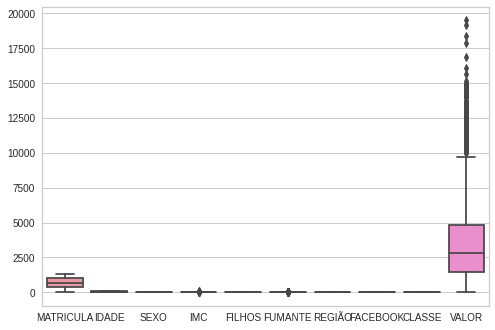

In [93]:
sns.boxplot(data = df_modelagem) 

In [95]:
colunas = []
obj_scaler = StandardScaler()
df_modelagem_modelo = df_modelagem
for i in df_modelagem.columns:
  if i != "VALOR":
    colunas.append(i)
    df_modelagem_modelo[i] = (obj_scaler.fit_transform(df_modelagem[i].values.reshape(-1,1)))
df_modelagem_modelo

,MATRICULA,IDADE,SEXO,IMC,FILHOS,FUMANTE,REGIÃO,FACEBOOK,CLASSE,VALOR
0,-1.201036,1.199553,0.981184,1.416968,-0.921392,-0.498451,0.487204,-1.461269,0.555966,3242.022018
1,0.475178,-0.517006,-1.019176,1.030330,1.580788,-0.498451,-0.398357,0.657055,-1.190344,1937.108119
2,-0.535748,0.555844,-1.019176,-1.024131,-0.087332,-0.498451,0.487204,0.657055,0.555966,8023.418951
3,-0.106949,0.126704,0.981184,0.027904,1.580788,2.006214,-0.398357,0.657055,0.206704,12109.298838
4,1.119676,-1.160716,0.981184,1.023242,1.580788,-0.498451,0.487204,0.657055,-0.491820,1100.182263
...,...,...,...,...,...,...,...,...,...,...
1206,-1.554471,1.557170,-1.019176,0.910637,-0.087332,2.006214,-0.398357,-1.461269,1.603752,14837.175275
1207,1.374356,-1.375286,-1.019176,0.207443,-0.921392,-0.498451,1.372765,0.657055,-0.142558,691.611254
1208,0.815618,-0.874623,-1.019176,0.862602,-0.921392,2.006214,-1.283918,0.657055,1.603752,11355.932171
1209,-0.961948,0.913460,0.981184,0.342097,1.580788,-0.498451,1.372765,-1.461269,-1.539606,3452.326988


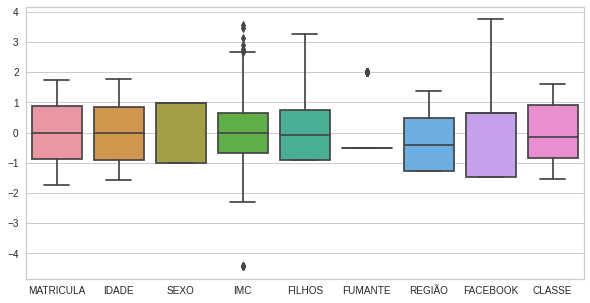

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df_modelagem_modelo.iloc[:,0:9]) 



```

TRATANDO OUTILERS COM KNN

In [97]:
obj_outiliers = KNN()
obj_outiliers.fit(df_modelagem_modelo.iloc[:,0:9])
previsão_outlier = obj_outiliers.labels_
outiliers = []
for i in range(len(previsão_outlier)):
  if previsão_outlier[i] == 1:
    outiliers.append(i) 
df_sem_outiler = df_modelagem_modelo.iloc[outiliers, :]

BASE TREINAMENTO E TESTE - OUTILERS COM KNN

In [98]:
x_train_out,x_teste_out, y_train_out, y_teste_out = train_test_split(df_sem_outiler.iloc[:,[1,3,5,7]].values, df_sem_outiler.iloc[:,-1].values, test_size = 0.3, random_state=0)

RANDOM FOREST REGRESSOR - OUTILERS COM KNN

In [99]:
obj_RandomForestRegressor = RandomForestRegressor(n_estimators=10)
obj_RandomForestRegressor.fit(x_train_out, y_train_out)
previsão = obj_RandomForestRegressor.predict(x_train_out)
obj_RandomForestRegressor.score(x_train_out, y_train_out)

0.9834869027098506

In [100]:
obj_RandomForestRegressor.score(x_teste_out, y_teste_out)

0.9121625353360139

VALIDAÇÃO CRUZADA - OUTILERS COM KNN

In [101]:
Resultados_RFG_r2_out =[]
Resultados_RFG_MSRE_out =[]
for i in range(30):
  obj_Kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  scores_1 = cross_val_score(obj_RandomForestRegressor,df_sem_outiler.iloc[:,[1,3,5,7]].values,df_sem_outiler.iloc[:,-1].values,scoring='r2')
  scores_2 = cross_val_score(obj_RandomForestRegressor,df_sem_outiler.iloc[:,[1,3,5,7]].values,df_sem_outiler.iloc[:,-1].values,scoring='neg_mean_absolute_error')
  Resultados_RFG_r2_out.append(scores_1.mean())
  Resultados_RFG_MSRE_out.append(-scores_2.mean())
np.mean(Resultados_RFG_r2_out), np.mean(Resultados_RFG_MSRE_out)

(0.9081133830134139, 879.2239312857051)

In [102]:
np.std(Resultados_RFG_r2_out) ,np.std(Resultados_RFG_MSRE_out)

(0.006334395952270696, 29.43129667524796)

In [103]:
px.scatter_matrix(df_sem_outiler, dimensions = ['IDADE','VALOR'], color='FUMANTE')

BASE DE TREINAMENTO E TESTE - COM OUTILIER

In [104]:
x_train,x_teste, y_train, y_teste = train_test_split(df_modelagem_modelo.iloc[:,[1,3,5,7]].values, df_modelagem_modelo.iloc[:,-1].values, test_size = 0.3, random_state=0)

RANDOM FOREST REGRESSOR - COM OUTILIER

In [105]:
obj_RandomForestRegressor = RandomForestRegressor(n_estimators=100)
obj_RandomForestRegressor.fit(x_train, y_train)
previsão = obj_RandomForestRegressor.predict(x_train)
obj_RandomForestRegressor.score(x_train, y_train)

0.9713703232257019

In [106]:
obj_RandomForestRegressor.score(x_teste, y_teste)


0.7500672176045964

VALIDAÇÃO CRUZADA - COM OUTILIER

In [107]:
Resultados_RFG_r2 =[]
Resultados_RFG_MSRE =[]
for i in range(30):
  obj_Kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  scores_1 = cross_val_score(obj_RandomForestRegressor,df_modelagem_modelo.iloc[:,[1,3,5,7]].values,df_modelagem_modelo.iloc[:,-1].values,scoring='r2')
  scores_2 = cross_val_score(obj_RandomForestRegressor,df_modelagem_modelo.iloc[:,[1,3,5,7]].values,df_modelagem_modelo.iloc[:,-1].values,scoring='neg_mean_absolute_error')
  Resultados_RFG_r2.append(scores_1.mean())
  Resultados_RFG_MSRE.append(-scores_2.mean())
np.mean(Resultados_RFG_r2), np.mean(Resultados_RFG_MSRE)


(0.7984381776179325, 937.4864247452185)

In [108]:
np.std(Resultados_RFG_r2) ,np.std(Resultados_RFG_MSRE)

(0.0012584021910302975, 4.158661039730205)

In [109]:
px.scatter_matrix(df_modelagem_modelo, dimensions = ['IDADE','VALOR'], color='FUMANTE')

TRATANDO OUTILERS COM A VISÃO HUMANA

In [110]:
index_excluir = []
for c,i in enumerate(df_modelagem_modelo['VALOR']):
  if i > 4918 and i < 10000:
    index_excluir.append(c)
for c, i in enumerate(df_modelagem_modelo['VALOR']):
  if i < 5000 and df_modelagem_modelo.loc[c ,'FUMANTE'] > 0:
    index_excluir.append(c)
  elif i > 5000 and df_modelagem_modelo.loc[c ,'FUMANTE'] < 0:
    index_excluir.append(c)

In [111]:
df_modelagem_modelo_humano = df_modelagem_modelo.drop(index_excluir)

In [112]:
px.scatter_matrix(df_modelagem_modelo_humano, dimensions = ['IDADE','VALOR'], color='FUMANTE')

BASE DE TREINAMENTO E TESTE - OUTILERS COM A VISÃO HUMANA

In [113]:
x_train,x_teste, y_train, y_teste = train_test_split(df_modelagem_modelo_humano.iloc[:,[1,5]].values, df_modelagem_modelo_humano.iloc[:,-1].values, test_size = 0.3, random_state=0)

RANDOM FOREST REGRESSOR - OUTILERS COM A VISÃO HUMANA

In [114]:
obj_RandomForestRegressor = RandomForestRegressor(n_estimators=2)
obj_RandomForestRegressor.fit(x_train, y_train)
previsão = obj_RandomForestRegressor.predict(x_train)
obj_RandomForestRegressor.score(x_train, y_train)

0.9731413390556575

In [115]:
obj_RandomForestRegressor.score(x_teste, y_teste)


0.9649328128921101

VALIDAÇÃO CRUZADA - OUTILERS COM A VISÃO HUMANA

In [116]:
Resultados_RFG_r2 =[]
Resultados_RFG_MSRE =[]
for i in range(30):
  obj_Kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  scores_1 = cross_val_score(obj_RandomForestRegressor,df_modelagem_modelo_humano.iloc[:,[1,5]].values,df_modelagem_modelo_humano.iloc[:,-1].values,scoring='r2')
  scores_2 = cross_val_score(obj_RandomForestRegressor,df_modelagem_modelo_humano.iloc[:,[1,5]].values,df_modelagem_modelo_humano.iloc[:,-1].values,scoring='neg_mean_absolute_error')
  Resultados_RFG_r2.append(scores_1.mean())
  Resultados_RFG_MSRE.append(-scores_2.mean())
np.mean(Resultados_RFG_r2), np.mean(Resultados_RFG_MSRE)

(0.9558611545078965, 388.20136369100913)

In [117]:
np.std(Resultados_RFG_r2) ,np.std(Resultados_RFG_MSRE)

(0.004403077774097089, 6.1524345703730265)